## The bootstrap
The bootstrap is a widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method. As a simple example, the bootstrap
can be used to estimate the standard errors of the coefficients from a linear regression fit.  However, the power of the bootstrap lies in the fact that it can be easily applied to a wide range of statistical learning methods including some for which a measure of varisability is otherwise difficult to obtain and is not automatically output by
statistical software.

### Bootstrap Example
-We wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$, where $X$ and $Y$ are random quantities. 

We will invest a fraction of our money $\alpha$ in $X$, and will invest the remaining $1 - \alpha$ in $Y$, respectively, where $X$ and $Y$ are random quantities.

Since there is variability in the returns on these two assets, we wish to choose $\alpha$ to minimize the total risk or variance of our investment. In other words, we want to minimize $Var(\alpha X + (1- \alpha)Y)$.

One can show that the value that minimizes the risk is given by:

$$ \alpha \quad = \quad \frac{ \sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_y -2\sigma_{XY}} $$

where $\sigma^2_X = Var(X)$, $\sigma^2_Y = Var(Y)$, and $\sigma_{XY} = Cov(X,Y).$

The qunatities $\sigma^2_X$, $\sigma^2_Y$, and $\sigma_{XY}$ are unknown. 

We can compute estimates for these quantities $\hat{\sigma}^2_X$, $\hat{\sigma}^2_Y$, and $\hat{\sigma}_{XY}$ using a dataset that contains measurements for $X$ and $Y$. 

We can then estimate the value of $\alpha$ that minimizes the variance of our investment using

$$ \hat{\alpha} \quad = \quad \frac{ \hat{\sigma}^2_Y - \hat{\sigma}_{XY}}{\hat{\sigma}^2_X + \hat{\sigma}^2_y -2\hat{\sigma}_{XY}} $$


Here we've simulated 100 pairs of returns for X and Y

In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 100 pairs of returns for investments X and Y
X = np.random.normal(loc=0.05, scale=0.1, size=100)
Y = np.random.normal(loc=0.03, scale=0.05, size=100)

# Create a DataFrame to store the returns
returns_df = pd.DataFrame({'X': X, 'Y': Y})
print(returns_df.head())

          X         Y
0  0.099671 -0.040769
1  0.036174  0.008968
2  0.114769  0.012864
3  0.202303 -0.010114
4  0.026585  0.021936


Now we plug the results into the given formula to calculate $\alpha$ for our dataset

In [2]:
import numpy as np

# Compute variance of X and Y
sigma_X_squared = returns_df['X'].var()
sigma_Y_squared = returns_df['Y'].var()

# Compute covariance of X and Y
sigma_XY = returns_df['X'].cov(returns_df['Y'])

# Compute alpha using the formula
alpha = (sigma_Y_squared - sigma_XY) / (sigma_X_squared + sigma_Y_squared - 2 * sigma_XY)

print(f"Alpha: {alpha}")

Alpha: 0.2447657805118273


Now let's simulate returns for $X$ and $Y$ 1000 times and calculate the mean of $\alpha$ over our simulation.

In [3]:
# Function to compute alpha
def compute_alpha(df):
    sigma_X_squared = df['X'].var()
    sigma_Y_squared = df['Y'].var()
    sigma_XY = df['X'].cov(df['Y'])
    alpha = (sigma_Y_squared - sigma_XY) / (sigma_X_squared + sigma_Y_squared - 2 * sigma_XY)
    return alpha

# Bootstrap to simulate 1000 estimates for alpha
n_iterations = 1000
alpha_estimates = []

for _ in range(n_iterations):
    sample_df = returns_df.sample(n=len(returns_df), replace=True)
    alpha_estimate = compute_alpha(sample_df)
    alpha_estimates.append(alpha_estimate)

alpha_estimates = np.array(alpha_estimates)
print(f"Mean of alpha estimates: {alpha_estimates.mean()}")
print(f"Standard deviation of alpha estimates: {alpha_estimates.std()}")

Mean of alpha estimates: 0.2436083306257431
Standard deviation of alpha estimates: 0.03872856337328258


and finally, let's create a histogram of our estimates

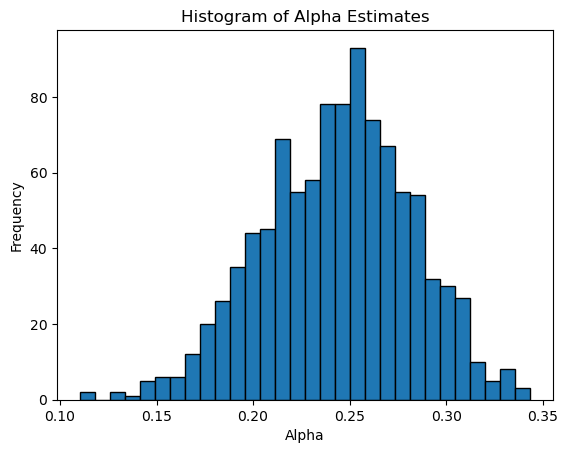

In [4]:
import matplotlib.pyplot as plt

# Create a histogram of the alpha estimates
plt.hist(alpha_estimates, bins=30, edgecolor='black')
plt.title('Histogram of Alpha Estimates')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.show()